# Multi-Layer Perceptron for Image Classification

Welome to the **first** programming assignment of the Deep Learning course. 

In this assignment, a complete set of Jupyter Notebook and python scripts are prepared for examining almost all critical factors in designing a Multi-layer Perceptron model.

You will complete the python scripts which have been provided in the project directory to build a deep network, and apply it to a multi-label classification problem. Additionally you will play around varoius factors which may enhance the performance of a deep neural network model.

**After this assignment you will be able to:**

 - Build and apply a deep neural network to supervised learning using PyTorch framework.
 - See how factors like **Regularization techniques**, **Activation functions**, **Number of layers and units**, **Weights initialization** and **Data augmentation** affect the result of learning process.
 
**Before you start:** Please read the Submission section at the bottom of the notebook carefully. 
 
Let's get started!

# 0. Packages and modules

Let's first import all the packages that you will need during this assignment.

In [1]:
from dataset import SignDigitDataset
from utils import *
from model import MLP
import torch

In [2]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"You are using {device}!")

You are using cpu!


# 1. Dataset

Sign languages (also known as signed languages) are languages that use manual communication to convey meaning. This can include simultaneously employing hand gestures, movement, orientation of the fingers, arms or body, and facial expressions to convey a speaker's ideas. [Source.](https://en.wikipedia.org/wiki/Sign_language)

The dataset that you'll be using during this assignment is a subset of the sign language digits. It contains six different classes representing the digits from 0 to 5. You can see some of the images below.

<p align="center">
  <img src="images/samples.png">
</p>

**Problem Statement:** You are given two dataset `train_signs.h5` and `test_signs.h5` containing:

    -- a training/test set of images labelled as one of the classes in {0, 1, 2, 3, 4, 5}.
    -- each image is of shape (64, 64, 3) where 3 is for the 3 channels (RGB).
    -- train a MLP model to classify the test images.
    
Let's get more familiar with the dataset.

---
## `dataset.py`:

One of the first steps for designing a deep learning model is to get to know the data as best as possible. The better we know the data (shape, data distribution, etc.), the more proper model can be designed.

For this we must create the dataset which we want to feed the model. As we are using PyTorch for this assignment, you must know how to create **torch data loaders**.

In this question you have to complete some parts of `__getitem__()` in `dataset.py` and the following functions in `utils.py`:

- `get_transformations()`: for data transformation and also needed augmentations.
- `get_one_hot()`: for converting the labels into a model usable labels.
- `visualize_samples()`: to plot some of the images to see some samples.


**Note:** Before that, please visit the official documentaion of pytorch for creating custom datasets to learn how we create them for pytorch deep learning models.
https://pytorch.org/tutorials/beginner/data_loading_tutorial.html

### `get_transformations()`:

As we mentioned earlier, the shape of the tensor we have now of images is **(n_samples, 64, 64, 3)**. But if we want to feed it to a MLP model, we must consider some transformations:

    -- Flattening them to have the shape of (n_samples, 64*64*3).
    -- Normalizing each pixel has to have a value between 0 - 1.(Hopefully this will be handled automatically)
    -- Convert the numpy arrays to tensors. (using transforms.ToTensor())
    
<p align="center">
  <img src="images/imvectorkiank.png">
</p>    
    
These were the minimum transformation which must be applied on the input raw images. Later in this assignment we will add some random transformations (a.k.a augmentations) which could affect the performance of the model.

### `get_one_hot()`:

Many time in deep learning you will have a $Y$ ranging from 0 to $C-1$, where $C$ is the number of the classes. If $C$ is for example 4, then you might have the following $y$ vector which you will need to convet like this:
    
<p align="center">
  <img src="images/onehot.png">
</p>    
    
This is called **one hot** encoding, because in the converted representation, exactly one element of each column is "hot" (meaning set to 1).

### `visualize_samples()`:

At the end of this part, we want to plot some random samples of the dataset. To do this, you have to complete `visualize_samples()` in `utils.py` using [Matplotlib](https://matplotlib.org) funcionalities.

After completing that function, run the cell below to observe the result.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

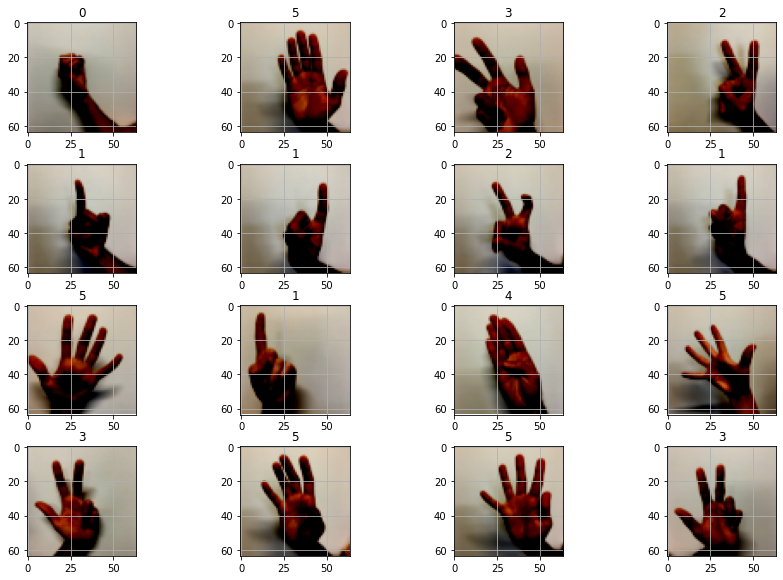

In [4]:
train_dataset = SignDigitDataset(root_dir='data/',
                                 h5_name='train_signs.h5',
                                 train=True,
                                 transform=get_transformations(64))

test_dataset = SignDigitDataset(root_dir='data/',
                                h5_name='test_signs.h5',
                                train=False,
                                transform=get_transformations(64))


visualize_samples(train_dataset, n_samples=16, cols=4)

# 2. Architecture of your model

Now that you are familiar with the dataset, it is time to build a deep neural network to classify sign digit images. All the modification which you have consider in this part, must be applied in `model.py`. It consits the a Pytorch class named as **MLP**. All the torch model classes must inherit `torch.nn.Module`.

For a review on how torch models have to be created, please visit the pytorch official documentaion: https://pytorch.org/tutorials/beginner/introyt/modelsyt_tutorial.html

More precisely, in this part, you will complete `MLP.__init__()` and `MLP.forward()` functions:

- `MLP.__init__()`: In this function, all the parameters will be initialized. such as number of layers and units per layer. Note that the model you are implementing must be capable to have every custom number of layers, neurons and also activation layers.

- `MLP.forward()`: For forward propagation purpose. *(~ 1 line of code)*

In [6]:
# to test the implemented functions (for Debugging purposes)
batch, C, H, W = 10, 3, 64, 64
zero_tensor = torch.zeros([batch, C, H, W], dtype=torch.float32)
zero_tensor = torch.reshape(zero_tensor, (batch, -1))
input_size = C*H*W
num_classes = 6
units = [input_size, 7, 7, num_classes]

mlp = MLP(units=units, hidden_layer_activation='relu')
print(mlp)
out = mlp(zero_tensor)
assert out.shape == torch.Size([batch, num_classes]), f'Model output size expected to be {torch.Size([batch, num_classes])}'

MLP(
  (activation): ReLU()
  (mlp): Sequential(
    (ff0): Linear(in_features=12288, out_features=7, bias=True)
    (activation0): ReLU()
    (ff1): Linear(in_features=7, out_features=7, bias=True)
    (activation1): ReLU()
    (ff2): Linear(in_features=7, out_features=7, bias=True)
    (activation2): ReLU()
    (ff3): Linear(in_features=7, out_features=6, bias=True)
  )
)


# 3. Tarining the model

Its time to train your beautiful model :) All you need is a `train.py` file and you have to follow the steps below in order complete it:

1. Create train and test data loaders with respect to some hyper-parameters including batch_size.
2. Get an instance of your MLP model.
3. Define an appropriate loss function (e.g. cross entropy loss)
4. Define an optimizers with proper hyperparameters such as (learning_rate, ...).
5. Implement the main loop function with n_epochs iterations which the learning and evaluation process occurred there. In this loop, you have to log the training and test set loss and accuracy to see if your model works correctly or not.

6. Save the model weights for laters usages.


## 3.1 Train your first MLP model (30 points)

After defining the model we need to trigger training process by using the code partly prepared in `train.py` after filling required lines run the following cell to start training. In this file some writers are defined which are later used for plotting visualizations in tensorboard framework. Summary information defined as scalars (like loss) are saved by this writers in logs folder near existing files.


## در کد من چون فرمودید باید با اکتیویشن فانکشن های مختلف اجرا شه در قسمت های بعدی باید نوع تابع اکتیویشن اعلام شه با دستور
## --activation relu/sigmoid/tanh
##  در غیر ای صورت خالی فرض شده و تابع اکتیویشن اعمال نمیگردد تا بدون این تابع اجرا شود برای همین کد شما را کامنت و مال خودم رو قرار دادم

In [7]:
# an example of how we run the train.py script
# !python train.py --n_epochs 100 --hidden_layers 25 12 --print_every 10 --learning_rate 0.001
!python train.py --n_epochs 100 --hidden_layers 100 50 --print_every 5 --learning_rate 0.0001 --batch_size 256 --activation relu --n_classes 6 --img_size 64


MLP(
  (activation): ReLU()
  (mlp): Sequential(
    (ff0): Linear(in_features=12288, out_features=100, bias=True)
    (activation0): ReLU()
    (ff1): Linear(in_features=100, out_features=100, bias=True)
    (activation1): ReLU()
    (ff2): Linear(in_features=100, out_features=50, bias=True)
    (activation2): ReLU()
    (ff3): Linear(in_features=50, out_features=6, bias=True)
  )
)
Last Train Loss of an Epoch [1/100]:Loss 1.7414
Mean Train loss of an Epoch [1/100]:Loss 1.7668
Accuracy on the test set : 46.666666666666664
Last Test Loss of an Epoch [1/100]:Loss 1.7330
Mean Test loss of an Epoch [1/100]:Loss 1.7244
Epoch [1/100]:	 Train Loss: 1.7668, Test Loss: 1.7244
Last Train Loss of an Epoch [2/100]:Loss 1.6495
Mean Train loss of an Epoch [2/100]:Loss 1.6884
Accuracy on the test set : 38.333333333333336
Last Test Loss of an Epoch [2/100]:Loss 1.6439
Mean Test loss of an Epoch [2/100]:Loss 1.6358
Last Train Loss of an Epoch [3/100]:Loss 1.5441
Mean Train loss of an Epoch [3/100]:Los

**Important note:** In this step, your code must work without any bugs and errors and you are free to play around your code to run different traininig procedures to have a saved proper model.

Also by running the cell below, you can your training curves (e.g. loss and accuracy).


In [1]:
# see the learning curve
%load_ext tensorboard 
%tensorboard --logdir=./runs --port=2000

Reusing TensorBoard on port 2000 (pid 3892), started 1:51:16 ago. (Use '!kill 3892' to kill it.)

# 4. Experimenting on features of an MLP

In the rest of this notebook, some experiments should be done on different setting like regularization, activation function, number of layers, etc combined with some visualizations.

## 4.1 Different initializations (20 points)

First we want to see the effect of two common initializers:

 1. Zero constant
 2. Uniform distribution
 
At first we use zero initializer **both for biases and weights**. By doing so, specially for weight initialization, the network will get in trouble with **breaking the symmetry.**

## zero constant  بلاک زیر برای اجرای مراحل با وزن صفر هست

In [11]:
############## YOUR CODES FOR RUNNING EXPERIMENTS OF QUESTION 1 STARTS HERE ##############

!python train.py --n_epochs 30 --hidden_layers 100 50 --init zero_constant --print_every 5 --activation relu --learning_rate 0.0001 --batch_size 256 --n_classes 6 --img_size 64


############## YOUR CODES FOR RUNNING EXPERIMENTS OF QUESTION 1 ENDS HERE ##############

MLP(
  (activation): ReLU()
  (mlp): Sequential(
    (ff0): Linear(in_features=12288, out_features=100, bias=True)
    (activation0): ReLU()
    (ff1): Linear(in_features=100, out_features=100, bias=True)
    (activation1): ReLU()
    (ff2): Linear(in_features=100, out_features=50, bias=True)
    (activation2): ReLU()
    (ff3): Linear(in_features=50, out_features=6, bias=True)
  )
)
Last Train Loss of an Epoch [1/30]:Loss 1.7917
Mean Train loss of an Epoch [1/30]:Loss 1.7918
Accuracy on the test set : 16.666666666666668
Last Test Loss of an Epoch [1/30]:Loss 1.7917
Mean Test loss of an Epoch [1/30]:Loss 1.7918
Epoch [1/30]:	 Train Loss: 1.7918, Test Loss: 1.7918
Last Train Loss of an Epoch [2/30]:Loss 1.7918
Mean Train loss of an Epoch [2/30]:Loss 1.7918
Accuracy on the test set : 16.666666666666668
Last Test Loss of an Epoch [2/30]:Loss 1.7918
Mean Test loss of an Epoch [2/30]:Loss 1.7918
Last Train Loss of an Epoch [3/30]:Loss 1.7918
Mean Train loss of an Epoch [3/30]:Loss 1.7918
Ac

In [2]:
# see the learning curve
%load_ext tensorboard 
%tensorboard --logdir=./runs --port=2000

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 2000 (pid 3892), started 1:53:11 ago. (Use '!kill 3892' to kill it.)

## Uniform distribution بلاک زیر برای اجرای با وزن های توزیع یکنواخت بین منفی یک تا یک هست

In [18]:
############## YOUR CODES FOR RUNNING EXPERIMENTS OF QUESTION 1 STARTS HERE ##############

!python train.py --n_epochs 100 --hidden_layers 100 50 --print_every 5 --init uniform --learning_rate 0.00045 --batch_size 64 --activation sigmoid --n_classes 6 --img_size 64

############## YOUR CODES FOR RUNNING EXPERIMENTS OF QUESTION 1 ENDS HERE ##############

MLP(
  (activation): Sigmoid()
  (mlp): Sequential(
    (ff0): Linear(in_features=12288, out_features=100, bias=True)
    (activation0): Sigmoid()
    (ff1): Linear(in_features=100, out_features=100, bias=True)
    (activation1): Sigmoid()
    (ff2): Linear(in_features=100, out_features=50, bias=True)
    (activation2): Sigmoid()
    (ff3): Linear(in_features=50, out_features=6, bias=True)
  )
)
Last Train Loss of an Epoch [1/100]:Loss 2.2328
Mean Train loss of an Epoch [1/100]:Loss 3.2754
Accuracy on the test set : 24.166666666666668
Last Test Loss of an Epoch [1/100]:Loss 2.6377
Mean Test loss of an Epoch [1/100]:Loss 2.5355
Epoch [1/100]:	 Train Loss: 3.2754, Test Loss: 2.5355
Last Train Loss of an Epoch [2/100]:Loss 2.4168
Mean Train loss of an Epoch [2/100]:Loss 2.4470
Accuracy on the test set : 20.833333333333332
Last Test Loss of an Epoch [2/100]:Loss 2.2610
Mean Test loss of an Epoch [2/100]:Loss 2.2263
Last Train Loss of an Epoch [3/100]:Loss 1.9478
Mean Train loss of an Epoch

Last Train Loss of an Epoch [72/100]:Loss 0.1062
Mean Train loss of an Epoch [72/100]:Loss 0.0881
Accuracy on the test set : 79.16666666666667
Last Test Loss of an Epoch [72/100]:Loss 0.6582
Mean Test loss of an Epoch [72/100]:Loss 0.7246
Last Train Loss of an Epoch [73/100]:Loss 0.0744
Mean Train loss of an Epoch [73/100]:Loss 0.0858
Accuracy on the test set : 78.33333333333333
Last Test Loss of an Epoch [73/100]:Loss 0.6900
Mean Test loss of an Epoch [73/100]:Loss 0.7450
Last Train Loss of an Epoch [74/100]:Loss 0.0681
Mean Train loss of an Epoch [74/100]:Loss 0.0833
Accuracy on the test set : 78.33333333333333
Last Test Loss of an Epoch [74/100]:Loss 0.6672
Mean Test loss of an Epoch [74/100]:Loss 0.7335
Last Train Loss of an Epoch [75/100]:Loss 0.0555
Mean Train loss of an Epoch [75/100]:Loss 0.0810
Accuracy on the test set : 77.5
Last Test Loss of an Epoch [75/100]:Loss 0.6631
Mean Test loss of an Epoch [75/100]:Loss 0.7217
Last Train Loss of an Epoch [76/100]:Loss 0.1003
Mean Tra

In [3]:
# see the learning curve
%load_ext tensorboard 
%tensorboard --logdir=./runs --port=2000

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 2000 (pid 3892), started 1:59:56 ago. (Use '!kill 3892' to kill it.)

### Question 1: 

Use tensorboard visualizations of learning curves (like loss and accuracy to discuss about the issue raised by using zeros initializer for weights. Does uniform random initializing a good choice as weight initialization method?

--------

## 4.2 Different activation functions (15 points)

Now, lets try different activation functions and evaluate the existence of activation functions amond hidden layers as a powerful to learn non-linear functions. Hence you have to train you model:

1. Without any activation layer (except softmax function for last layer).
2. With `nn.Sigmoid()` as hidden layer activation functions.
3. With `nn.ReLu()` as hidden layer activation functions.



## Without any activation بدون لایه اکتیویشن

In [20]:
############## YOUR CODES FOR RUNNING EXPERIMENTS OF QUESTION 2 STARTS HERE ##############

!python train.py --n_epochs 100 --hidden_layers 100 50 --print_every 5 --learning_rate 0.0001 --batch_size 256 --n_classes 6 --img_size 64

############## YOUR CODES FOR RUNNING EXPERIMENTS OF QUESTION 2 ENDS HERE ##############

MLP(
  (mlp): Sequential(
    (ff0): Linear(in_features=12288, out_features=100, bias=True)
    (ff1): Linear(in_features=100, out_features=100, bias=True)
    (ff2): Linear(in_features=100, out_features=50, bias=True)
    (ff3): Linear(in_features=50, out_features=6, bias=True)
  )
)
Last Train Loss of an Epoch [1/100]:Loss 1.5368
Mean Train loss of an Epoch [1/100]:Loss 1.6904
Accuracy on the test set : 41.666666666666664
Last Test Loss of an Epoch [1/100]:Loss 1.5401
Mean Test loss of an Epoch [1/100]:Loss 1.5132
Epoch [1/100]:	 Train Loss: 1.6904, Test Loss: 1.5132
Last Train Loss of an Epoch [2/100]:Loss 1.2526
Mean Train loss of an Epoch [2/100]:Loss 1.4161
Accuracy on the test set : 57.5
Last Test Loss of an Epoch [2/100]:Loss 1.2871
Mean Test loss of an Epoch [2/100]:Loss 1.2916
Last Train Loss of an Epoch [3/100]:Loss 1.0310
Mean Train loss of an Epoch [3/100]:Loss 1.2172
Accuracy on the test set : 53.333333333333336
Last Test Loss of an Epoch [3/100]:Loss 1.1414
Mean Test los

Mean Test loss of an Epoch [39/100]:Loss 0.3862
Last Train Loss of an Epoch [40/100]:Loss 0.0370
Mean Train loss of an Epoch [40/100]:Loss 0.0493
Accuracy on the test set : 83.33333333333333
Last Test Loss of an Epoch [40/100]:Loss 0.2884
Mean Test loss of an Epoch [40/100]:Loss 0.3642
Last Train Loss of an Epoch [41/100]:Loss 0.0476
Mean Train loss of an Epoch [41/100]:Loss 0.0483
Accuracy on the test set : 85.0
Last Test Loss of an Epoch [41/100]:Loss 0.3347
Mean Test loss of an Epoch [41/100]:Loss 0.4100
Epoch [41/100]:	 Train Loss: 0.0483, Test Loss: 0.4100
Last Train Loss of an Epoch [42/100]:Loss 0.0491
Mean Train loss of an Epoch [42/100]:Loss 0.0409
Accuracy on the test set : 85.83333333333333
Last Test Loss of an Epoch [42/100]:Loss 0.3047
Mean Test loss of an Epoch [42/100]:Loss 0.3757
Last Train Loss of an Epoch [43/100]:Loss 0.0410
Mean Train loss of an Epoch [43/100]:Loss 0.0440
Accuracy on the test set : 86.66666666666667
Last Test Loss of an Epoch [43/100]:Loss 0.3251
Me

In [4]:
# see the learning curve
%load_ext tensorboard 
%tensorboard --logdir=./runs --port=2000

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 2000 (pid 3892), started 2:00:51 ago. (Use '!kill 3892' to kill it.)

## Sigmoid با سیگمویید

In [23]:
############## YOUR CODES FOR RUNNING EXPERIMENTS OF QUESTION 2 STARTS HERE ##############

!python train.py --n_epochs 150 --hidden_layers 100 50 --print_every 5 --activation sigmoid --learning_rate 0.00045 --batch_size 64 --n_classes 6 --img_size 64


############## YOUR CODES FOR RUNNING EXPERIMENTS OF QUESTION 2 ENDS HERE ##############

MLP(
  (activation): Sigmoid()
  (mlp): Sequential(
    (ff0): Linear(in_features=12288, out_features=100, bias=True)
    (activation0): Sigmoid()
    (ff1): Linear(in_features=100, out_features=100, bias=True)
    (activation1): Sigmoid()
    (ff2): Linear(in_features=100, out_features=50, bias=True)
    (activation2): Sigmoid()
    (ff3): Linear(in_features=50, out_features=6, bias=True)
  )
)
Last Train Loss of an Epoch [1/150]:Loss 1.8633
Mean Train loss of an Epoch [1/150]:Loss 1.8628
Accuracy on the test set : 21.666666666666668
Last Test Loss of an Epoch [1/150]:Loss 1.8097
Mean Test loss of an Epoch [1/150]:Loss 1.8200
Epoch [1/150]:	 Train Loss: 1.8628, Test Loss: 1.8200
Last Train Loss of an Epoch [2/150]:Loss 1.7992
Mean Train loss of an Epoch [2/150]:Loss 1.8051
Accuracy on the test set : 16.666666666666668
Last Test Loss of an Epoch [2/150]:Loss 1.7870
Mean Test loss of an Epoch [2/150]:Loss 1.7928
Last Train Loss of an Epoch [3/150]:Loss 1.7951
Mean Train loss of an Epoch

Mean Train loss of an Epoch [36/150]:Loss 0.9076
Accuracy on the test set : 64.16666666666667
Last Test Loss of an Epoch [36/150]:Loss 1.0465
Mean Test loss of an Epoch [36/150]:Loss 1.0057
Epoch [36/150]:	 Train Loss: 0.9076, Test Loss: 1.0057
Last Train Loss of an Epoch [37/150]:Loss 0.8962
Mean Train loss of an Epoch [37/150]:Loss 0.8744
Accuracy on the test set : 65.83333333333333
Last Test Loss of an Epoch [37/150]:Loss 1.0206
Mean Test loss of an Epoch [37/150]:Loss 0.9707
Last Train Loss of an Epoch [38/150]:Loss 0.8067
Mean Train loss of an Epoch [38/150]:Loss 0.8464
Accuracy on the test set : 65.0
Last Test Loss of an Epoch [38/150]:Loss 0.9970
Mean Test loss of an Epoch [38/150]:Loss 0.9651
Last Train Loss of an Epoch [39/150]:Loss 0.8251
Mean Train loss of an Epoch [39/150]:Loss 0.8204
Accuracy on the test set : 67.5
Last Test Loss of an Epoch [39/150]:Loss 0.9468
Mean Test loss of an Epoch [39/150]:Loss 0.9259
Last Train Loss of an Epoch [40/150]:Loss 0.7528
Mean Train loss

In [5]:
# see the learning curve
%load_ext tensorboard 
%tensorboard --logdir=./runs --port 2000

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 2000 (pid 6284), started 1:41:44 ago. (Use '!kill 6284' to kill it.)

## ReLu با رلو

In [25]:
!python train.py --n_epochs 100 --hidden_layers 100 50 --activation relu --print_every 5 --learning_rate 0.0001 --batch_size 256 --n_classes 6 --img_size 64


MLP(
  (activation): ReLU()
  (mlp): Sequential(
    (ff0): Linear(in_features=12288, out_features=100, bias=True)
    (activation0): ReLU()
    (ff1): Linear(in_features=100, out_features=100, bias=True)
    (activation1): ReLU()
    (ff2): Linear(in_features=100, out_features=50, bias=True)
    (activation2): ReLU()
    (ff3): Linear(in_features=50, out_features=6, bias=True)
  )
)
Last Train Loss of an Epoch [1/100]:Loss 1.7137
Mean Train loss of an Epoch [1/100]:Loss 1.7714
Accuracy on the test set : 45.833333333333336
Last Test Loss of an Epoch [1/100]:Loss 1.7398
Mean Test loss of an Epoch [1/100]:Loss 1.7337
Epoch [1/100]:	 Train Loss: 1.7714, Test Loss: 1.7337
Last Train Loss of an Epoch [2/100]:Loss 1.6712
Mean Train loss of an Epoch [2/100]:Loss 1.6949
Accuracy on the test set : 42.5
Last Test Loss of an Epoch [2/100]:Loss 1.6644
Mean Test loss of an Epoch [2/100]:Loss 1.6499
Last Train Loss of an Epoch [3/100]:Loss 1.5362
Mean Train loss of an Epoch [3/100]:Loss 1.5968
Accur

In [26]:
# see the learning curve
%load_ext tensorboard 
%tensorboard --logdir=./runs --port 2000

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 2000 (pid 6284), started 0:03:13 ago. (Use '!kill 6284' to kill it.)

## Tanh با تانژانت هایپربولیک

In [27]:
!python train.py --n_epochs 100 --hidden_layers 100 50 --activation tanh --print_every 5 --learning_rate 0.0001 --batch_size 256 --n_classes 6 --img_size 64


MLP(
  (activation): Tanh()
  (mlp): Sequential(
    (ff0): Linear(in_features=12288, out_features=100, bias=True)
    (activation0): Tanh()
    (ff1): Linear(in_features=100, out_features=100, bias=True)
    (activation1): Tanh()
    (ff2): Linear(in_features=100, out_features=50, bias=True)
    (activation2): Tanh()
    (ff3): Linear(in_features=50, out_features=6, bias=True)
  )
)
Last Train Loss of an Epoch [1/100]:Loss 1.6128
Mean Train loss of an Epoch [1/100]:Loss 1.7169
Accuracy on the test set : 47.5
Last Test Loss of an Epoch [1/100]:Loss 1.6135
Mean Test loss of an Epoch [1/100]:Loss 1.5986
Epoch [1/100]:	 Train Loss: 1.7169, Test Loss: 1.5986
Last Train Loss of an Epoch [2/100]:Loss 1.4412
Mean Train loss of an Epoch [2/100]:Loss 1.5250
Accuracy on the test set : 61.666666666666664
Last Test Loss of an Epoch [2/100]:Loss 1.4620
Mean Test loss of an Epoch [2/100]:Loss 1.4627
Last Train Loss of an Epoch [3/100]:Loss 1.4029
Mean Train loss of an Epoch [3/100]:Loss 1.3910
Accur

In [6]:
# see the learning curve
%load_ext tensorboard 
%tensorboard --logdir=./runs --port 2000

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 2000 (pid 6284), started 1:42:08 ago. (Use '!kill 6284' to kill it.)

### Question 2: 

Use tensorboard visualizations of learning curves (like loss and accuracy to discuss about the impact of learning procedures with/without different activation functions for hidden layers. Which one do you chosse as a best case?

--------

## 4.3 Differnet architectures (20 points)

Next, we will cast light on the importance of architecture of neural networks (more specifically number of layers and units).

In the first one we have 3 hidden layers with 500, 100, 50 units, respectively. This model imposes high computational cost. On the other hand, the second network has one less hidden layer but same number of units in the rest of layers. Totally it has less complexity in terms of number of parameters compared with the first network.

In [9]:
num_hidden_list = [[500, 100, 50], [100, 50]]

############## YOUR CODES FOR RUNNING EXPERIMENTS OF QUESTION 3 STARTS HERE ##############
!python train.py --n_epochs 60 --hidden_layers 100 50 --print_every 5 --learning_rate 0.0001 --batch_size 256 --n_classes 6 --img_size 64

############## YOUR CODES FOR RUNNING EXPERIMENTS OF QUESTION 3 ENDS HERE ##############

MLP(
  (mlp): Sequential(
    (ff0): Linear(in_features=12288, out_features=100, bias=True)
    (ff1): Linear(in_features=100, out_features=100, bias=True)
    (ff2): Linear(in_features=100, out_features=50, bias=True)
    (ff3): Linear(in_features=50, out_features=6, bias=True)
  )
)
Last Train Loss of an Epoch [1/60]:Loss 1.5982
Mean Train loss of an Epoch [1/60]:Loss 1.6931
Accuracy on the test set : 47.5
Last Test Loss of an Epoch [1/60]:Loss 1.6196
Mean Test loss of an Epoch [1/60]:Loss 1.5858
Epoch [1/60]:	 Train Loss: 1.6931, Test Loss: 1.5858
Last Train Loss of an Epoch [2/60]:Loss 1.3971
Mean Train loss of an Epoch [2/60]:Loss 1.4513
Accuracy on the test set : 56.666666666666664
Last Test Loss of an Epoch [2/60]:Loss 1.3365
Mean Test loss of an Epoch [2/60]:Loss 1.3332
Last Train Loss of an Epoch [3/60]:Loss 1.1671
Mean Train loss of an Epoch [3/60]:Loss 1.2266
Accuracy on the test set : 62.5
Last Test Loss of an Epoch [3/60]:Loss 1.1736
Mean Test loss of an Epoch [3/60]:Loss 

In [10]:
# see the learning curve
%load_ext tensorboard 
%tensorboard --logdir=./runs --port 2000

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 2000 (pid 6284), started 1:52:38 ago. (Use '!kill 6284' to kill it.)

In [11]:


!python train.py --n_epochs 60 --hidden_layers 500 100 50 --print_every 5 --learning_rate 0.0001 --batch_size 256 --n_classes 6 --img_size 64



MLP(
  (mlp): Sequential(
    (ff0): Linear(in_features=12288, out_features=500, bias=True)
    (ff1): Linear(in_features=500, out_features=500, bias=True)
    (ff2): Linear(in_features=500, out_features=100, bias=True)
    (ff3): Linear(in_features=100, out_features=50, bias=True)
    (ff4): Linear(in_features=50, out_features=6, bias=True)
  )
)
Last Train Loss of an Epoch [1/60]:Loss 1.3679
Mean Train loss of an Epoch [1/60]:Loss 1.6664
Accuracy on the test set : 51.666666666666664
Last Test Loss of an Epoch [1/60]:Loss 1.4325
Mean Test loss of an Epoch [1/60]:Loss 1.3979
Epoch [1/60]:	 Train Loss: 1.6664, Test Loss: 1.3979
Last Train Loss of an Epoch [2/60]:Loss 1.0346
Mean Train loss of an Epoch [2/60]:Loss 1.2409
Accuracy on the test set : 57.5
Last Test Loss of an Epoch [2/60]:Loss 1.0918
Mean Test loss of an Epoch [2/60]:Loss 1.0966
Last Train Loss of an Epoch [3/60]:Loss 1.0686
Mean Train loss of an Epoch [3/60]:Loss 0.9736
Accuracy on the test set : 61.666666666666664
Last Te

Accuracy on the test set : 88.33333333333333
Last Test Loss of an Epoch [44/60]:Loss 0.4002
Mean Test loss of an Epoch [44/60]:Loss 0.4721
Last Train Loss of an Epoch [45/60]:Loss 0.0034
Mean Train loss of an Epoch [45/60]:Loss 0.0034
Accuracy on the test set : 88.33333333333333
Last Test Loss of an Epoch [45/60]:Loss 0.4071
Mean Test loss of an Epoch [45/60]:Loss 0.4732
Last Train Loss of an Epoch [46/60]:Loss 0.0034
Mean Train loss of an Epoch [46/60]:Loss 0.0032
Accuracy on the test set : 88.33333333333333
Last Test Loss of an Epoch [46/60]:Loss 0.3967
Mean Test loss of an Epoch [46/60]:Loss 0.4792
Epoch [46/60]:	 Train Loss: 0.0032, Test Loss: 0.4792
Last Train Loss of an Epoch [47/60]:Loss 0.0037
Mean Train loss of an Epoch [47/60]:Loss 0.0031
Accuracy on the test set : 88.33333333333333
Last Test Loss of an Epoch [47/60]:Loss 0.3800
Mean Test loss of an Epoch [47/60]:Loss 0.4804
Last Train Loss of an Epoch [48/60]:Loss 0.0019
Mean Train loss of an Epoch [48/60]:Loss 0.0028
Accura

In [12]:
# see the learning curve
%load_ext tensorboard 
%tensorboard --logdir=./runs --port 2000

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 2000 (pid 6284), started 1:56:41 ago. (Use '!kill 6284' to kill it.)

### Question 3:

By using tensorboard visualiztions justify the different outcomes of training the above two neural network architectures.

--------

## 4.4 Overfitting prevention (15 points)

Another important point to consider is applying regularization or data augmentation methods and being aware of its impact on training and generalization. Its most important rule is to prevent our learning process from overfitting (you may have encountered this phenomenon above!)

In this part you have to modify your codes to support **at least one of the following methods**:

1. Add some other useful transformation(augmentation) techniques using `torchvision.transforms`. All the codes for this part must be added in `dataset.py` and `utils.py`. (https://pytorch.org/vision/stable/transforms.html)

2. Add dropout to your hidden layers. Try dropout rates such as 0.2 and 0.5. (https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html)


## ترنسفورمیشن های مورد نظر از اول اعمال شده اند اینجا فقط آپشن دراپ اوت رو فعال کردیم در حالت عادی فالس بود

In [34]:
############## YOUR CODES FOR RUNNING EXPERIMENTS OF QUESTION 4 STARTS HERE ##############

!python train.py --n_epochs 100 --hidden_layers 100 50 --print_every 5 --dropout True --learning_rate 0.0001 --batch_size 256 --activation relu --n_classes 6 --img_size 64

############## YOUR CODES FOR RUNNING EXPERIMENTS OF QUESTION 4 ENDS HERE ##############

MLP(
  (activation): ReLU()
  (mlp): Sequential(
    (dropout0): Dropout(p=0.1, inplace=False)
    (ff0): Linear(in_features=12288, out_features=100, bias=True)
    (activation0): ReLU()
    (dropout1): Dropout(p=0.1, inplace=False)
    (ff1): Linear(in_features=100, out_features=100, bias=True)
    (activation1): ReLU()
    (dropout2): Dropout(p=0.1, inplace=False)
    (ff2): Linear(in_features=100, out_features=50, bias=True)
    (activation2): ReLU()
    (dropout3): Dropout(p=0.1, inplace=False)
    (ff3): Linear(in_features=50, out_features=6, bias=True)
  )
)
Last Train Loss of an Epoch [1/100]:Loss 1.7200
Mean Train loss of an Epoch [1/100]:Loss 1.7704
Accuracy on the test set : 24.166666666666668
Last Test Loss of an Epoch [1/100]:Loss 1.7465
Mean Test loss of an Epoch [1/100]:Loss 1.7395
Epoch [1/100]:	 Train Loss: 1.7704, Test Loss: 1.7395
Last Train Loss of an Epoch [2/100]:Loss 1.6902
Mean Train loss of an Epoch [2/100]:Loss 1.7041
Accuracy on the test set : 45.0
Last Test L

Mean Train loss of an Epoch [34/100]:Loss 0.3920
Accuracy on the test set : 80.0
Last Test Loss of an Epoch [34/100]:Loss 0.5439
Mean Test loss of an Epoch [34/100]:Loss 0.5304
Last Train Loss of an Epoch [35/100]:Loss 0.2966
Mean Train loss of an Epoch [35/100]:Loss 0.3731
Accuracy on the test set : 85.0
Last Test Loss of an Epoch [35/100]:Loss 0.4789
Mean Test loss of an Epoch [35/100]:Loss 0.4529
Last Train Loss of an Epoch [36/100]:Loss 0.3702
Mean Train loss of an Epoch [36/100]:Loss 0.3592
Accuracy on the test set : 75.83333333333333
Last Test Loss of an Epoch [36/100]:Loss 0.4773
Mean Test loss of an Epoch [36/100]:Loss 0.5230
Epoch [36/100]:	 Train Loss: 0.3592, Test Loss: 0.5230
Last Train Loss of an Epoch [37/100]:Loss 0.2939
Mean Train loss of an Epoch [37/100]:Loss 0.3292
Accuracy on the test set : 80.83333333333333
Last Test Loss of an Epoch [37/100]:Loss 0.5340
Mean Test loss of an Epoch [37/100]:Loss 0.5427
Last Train Loss of an Epoch [38/100]:Loss 0.3446
Mean Train loss

In [13]:
# see the learning curve
%load_ext tensorboard 
%tensorboard --logdir=./runs --port 2000

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 2000 (pid 6284), started 2:02:34 ago. (Use '!kill 6284' to kill it.)

### Question 4:

By using tensorboard visualiztions justify the different outcomes of training the above two neural network architectures.
To show this, your learning cuvres must include both training and test curves.

--------

## 4.5 Hyper-parameters tuning (Optional - 10 points)

Great! We saw how different factors would affect the performance of a MLP model. Now its time to find the best model by tuning various hyper-parameters we have. In this part you are welcomed to train the best model. More specifically, you have to:

1. Try different hyper-parameters (n_hidden_layers, batch_size, learning_rate, optimizer, momentum rate and etc. )

2. save the best model as `best_model.pth` and
3. Write all the assumed hyper-parameters in `params.yaml` file.
4. Use tenorboard to plot the learning curve and report the final loss and accuracy that you get for both training and test sets.

In [15]:
############## YOUR CODES FOR RUNNING EXPERIMENTS OF QUESTION 5 STARTS HERE ##############

!python train.py --n_epochs 70 --hidden_layers 100 50 --print_every 5 --learning_rate 0.00045 --batch_size 256 --activation relu --n_classes 6 --img_size 64



# بهترین سیستم برای اجرا کد بالا و کدی پایین هستن وزن ها نیز ذخیره شده اند
# !python train.py --n_epochs 100 --hidden_layers 100 50 --activation tanh --print_every 5 --learning_rate 0.0001 --batch_size 256 --n_classes 6 --img_size 64

############## YOUR CODES FOR RUNNING EXPERIMENTS OF QUESTION 5 ENDS HERE ##############

MLP(
  (activation): ReLU()
  (mlp): Sequential(
    (ff0): Linear(in_features=12288, out_features=100, bias=True)
    (activation0): ReLU()
    (ff1): Linear(in_features=100, out_features=100, bias=True)
    (activation1): ReLU()
    (ff2): Linear(in_features=100, out_features=50, bias=True)
    (activation2): ReLU()
    (ff3): Linear(in_features=50, out_features=6, bias=True)
  )
)
Last Train Loss of an Epoch [1/70]:Loss 1.5918
Mean Train loss of an Epoch [1/70]:Loss 1.7151
Accuracy on the test set : 42.5
Last Test Loss of an Epoch [1/70]:Loss 1.5715
Mean Test loss of an Epoch [1/70]:Loss 1.5586
Epoch [1/70]:	 Train Loss: 1.7151, Test Loss: 1.5586
Last Train Loss of an Epoch [2/70]:Loss 1.2363
Mean Train loss of an Epoch [2/70]:Loss 1.4165
Accuracy on the test set : 50.0
Last Test Loss of an Epoch [2/70]:Loss 1.2813
Mean Test loss of an Epoch [2/70]:Loss 1.2347
Last Train Loss of an Epoch [3/70]:Loss 1.1594
Mean Train loss of an Epoch [3/70]:Loss 1.1240
Accuracy on the test set : 65.

Last Train Loss of an Epoch [35/70]:Loss 0.0149
Mean Train loss of an Epoch [35/70]:Loss 0.0185
Accuracy on the test set : 89.16666666666667
Last Test Loss of an Epoch [35/70]:Loss 0.3492
Mean Test loss of an Epoch [35/70]:Loss 0.3503
Last Train Loss of an Epoch [36/70]:Loss 0.0210
Mean Train loss of an Epoch [36/70]:Loss 0.0195
Accuracy on the test set : 85.83333333333333
Last Test Loss of an Epoch [36/70]:Loss 0.3485
Mean Test loss of an Epoch [36/70]:Loss 0.3042
Epoch [36/70]:	 Train Loss: 0.0195, Test Loss: 0.3042
Last Train Loss of an Epoch [37/70]:Loss 0.0108
Mean Train loss of an Epoch [37/70]:Loss 0.0161
Accuracy on the test set : 90.0
Last Test Loss of an Epoch [37/70]:Loss 0.3640
Mean Test loss of an Epoch [37/70]:Loss 0.3534
Last Train Loss of an Epoch [38/70]:Loss 0.0109
Mean Train loss of an Epoch [38/70]:Loss 0.0150
Accuracy on the test set : 89.16666666666667
Last Test Loss of an Epoch [38/70]:Loss 0.3651
Mean Test loss of an Epoch [38/70]:Loss 0.3189
Last Train Loss of 

In [17]:
!python train.py --n_epochs 100 --hidden_layers 100 50 --activation tanh --print_every 5 --learning_rate 0.0001 --batch_size 256 --n_classes 6 --img_size 64


MLP(
  (activation): Tanh()
  (mlp): Sequential(
    (ff0): Linear(in_features=12288, out_features=100, bias=True)
    (activation0): Tanh()
    (ff1): Linear(in_features=100, out_features=100, bias=True)
    (activation1): Tanh()
    (ff2): Linear(in_features=100, out_features=50, bias=True)
    (activation2): Tanh()
    (ff3): Linear(in_features=50, out_features=6, bias=True)
  )
)
Last Train Loss of an Epoch [1/100]:Loss 1.6053
Mean Train loss of an Epoch [1/100]:Loss 1.7114
Accuracy on the test set : 41.666666666666664
Last Test Loss of an Epoch [1/100]:Loss 1.6167
Mean Test loss of an Epoch [1/100]:Loss 1.6009
Epoch [1/100]:	 Train Loss: 1.7114, Test Loss: 1.6009
Last Train Loss of an Epoch [2/100]:Loss 1.4884
Mean Train loss of an Epoch [2/100]:Loss 1.5324
Accuracy on the test set : 57.5
Last Test Loss of an Epoch [2/100]:Loss 1.4688
Mean Test loss of an Epoch [2/100]:Loss 1.4682
Last Train Loss of an Epoch [3/100]:Loss 1.3242
Mean Train loss of an Epoch [3/100]:Loss 1.4013
Accur

In [18]:
# see the learning curve
%load_ext tensorboard 
%tensorboard --logdir=./runs --port 2000

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 2000 (pid 6284), started 2:13:46 ago. (Use '!kill 6284' to kill it.)

# 5. Submission

Please read the notes here carefully:

1. In addition to completing the code files, please send a report including your answer to these questions as well. Do not forget to put the diagrams and visualizations needed in each part.

2. The file you upload must be named as `[Student ID]-[Your name].zip`.

3. Your notebook must be executed without any problem. If not, you will lose points for each part consequently. 

4. **Important Note:** The outputs of the code blocks must be remained in your notebook, otherwise, you definitly lose all the points of that part.


In case you have any questions, contact **mohammad99hashemi@gmail.com** or **naghmefarzi@gmail.com**.

Good luck :)